In [ ]:
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
sns.set()
import pandas as pd
from pneumonia.evaluation.commons import generate_summary_of_experiments_from_dir
import os

%matplotlib inline

In [2]:
def plot_bar(df: pd.DataFrame, metric: str, ylim=(0.9, 1.0)):
    df.plot(y=["train_%s" % metric, "val_%s" % metric], kind="bar", ylim=ylim, figsize=(18, 8), grid=True)

In [3]:
summary_df = generate_summary_of_experiments_from_dir("output/models/VGG19/experiments")
summary_df.set_index(summary_df.name, inplace=True)

In [4]:
summary_df.head(6)

,all_dropout,batch_normalization_after_vgg,batch_normalization_between_dense,batch_size,data_augmented,dense_neurons,dropout,early_stopping_patience,epochs,frozen_layers,...,total_dense_layers,train_acc,train_f1_score,train_precision,train_recall,val_acc,val_batch_size,val_f1_score,val_precision,val_recall
name,,,,,,,,,,,,,,,,,,,,,
VGG19_True_False_False_cbe595c98d,True,False,False,64,True,2048,0.1,20,100,21,...,3,0.982137,0.982283,0.974351,0.990344,0.970335,128,0.979699,0.996005,0.963918
VGG19_False_False_False_7300f04332,False,False,False,64,True,2048,NaN,20,100,21,...,3,0.988252,0.988348,0.980367,0.996460,0.974163,128,0.982387,0.994716,0.970361
VGG19_False_False_False_edbfe1c363,False,False,False,64,True,512,NaN,20,100,21,...,3,0.970872,0.971688,0.945222,0.999678,0.979904,128,0.986425,0.989624,0.983247
VGG19_False_False_False_9e4204b154,False,False,False,64,True,1024,0.1,20,100,21,...,3,0.958964,0.960422,0.927458,0.995816,0.975120,128,0.983095,0.992126,0.974227
VGG19_True_False_False_2c4556ee74,True,False,False,64,True,2048,NaN,20,100,21,...,3,0.974734,0.975342,0.952454,0.999356,0.977990,128,0.985055,0.993447,0.976804
VGG19_True_False_False_c3449e7c22,True,False,False,64,True,2048,0.2,20,100,21,...,3,0.991632,0.991651,0.989426,0.993885,0.973206,128,0.981699,0.996021,0.967784


In [5]:
len(summary_df)

22

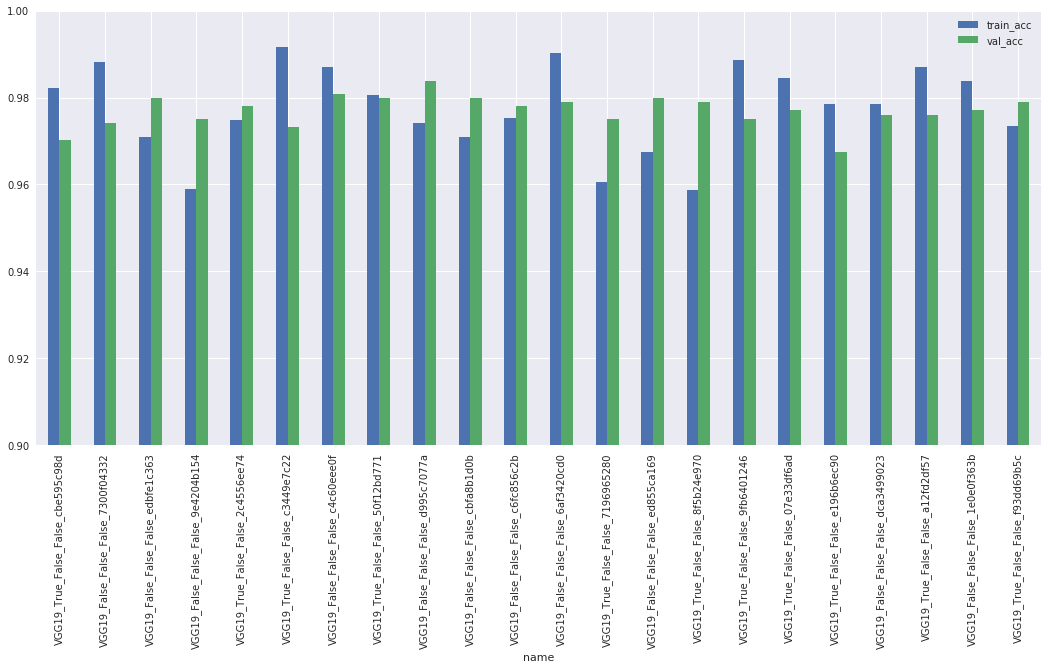

In [6]:
plot_bar(summary_df, "acc")

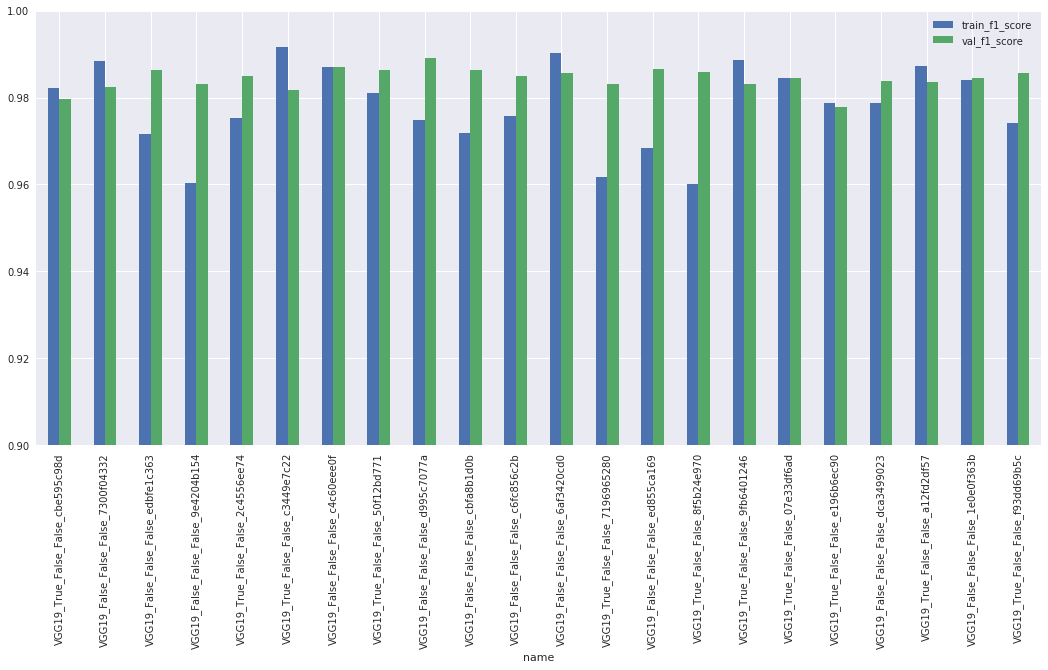

In [7]:
plot_bar(summary_df, "f1_score")

In [8]:
summary_df.groupby("sampling_strategy")["train_acc", "val_acc", "train_f1_score", "val_f1_score"].mean()

,train_acc,val_acc,train_f1_score,val_f1_score
sampling_strategy,,,,
oversample,0.977536,0.97699,0.978052,0.984356


In [9]:
summary_df.groupby("interpolation")["train_acc", "val_acc", "train_f1_score", "val_f1_score"].mean()

,train_acc,val_acc,train_f1_score,val_f1_score
interpolation,,,,
lanczos,0.977536,0.97699,0.978052,0.984356


In [11]:
#summary_df.groupby("input_shape")["train_acc", "val_acc", "train_f1_score", "val_f1_score"].mean()

In [12]:
summary_df.groupby("learning_rate")["train_acc", "val_acc", "train_f1_score", "val_f1_score"].mean()

,train_acc,val_acc,train_f1_score,val_f1_score
learning_rate,,,,
0.00005,0.977536,0.97699,0.978052,0.984356


In [13]:
summary_df.groupby("dense_neurons")["train_acc", "val_acc", "train_f1_score", "val_f1_score"].mean()

,train_acc,val_acc,train_f1_score,val_f1_score
dense_neurons,,,,
512,0.975660,0.977033,0.976267,0.984393
1024,0.975720,0.977632,0.976316,0.984805
2048,0.982459,0.976077,0.982747,0.983707


In [14]:
summary_df.groupby("total_dense_layers")["train_acc", "val_acc", "train_f1_score", "val_f1_score"].mean()

,train_acc,val_acc,train_f1_score,val_f1_score
total_dense_layers,,,,
3,0.977536,0.97699,0.978052,0.984356


In [15]:
summary_df.groupby("all_dropout")["train_acc", "val_acc", "train_f1_score", "val_f1_score"].mean()

,train_acc,val_acc,train_f1_score,val_f1_score
all_dropout,,,,
False,0.976856,0.978512,0.977415,0.985425
True,0.978216,0.975468,0.978689,0.983287


In [16]:
summary_df.groupby("dropout")["train_acc", "val_acc", "train_f1_score", "val_f1_score"].mean()

,train_acc,val_acc,train_f1_score,val_f1_score
dropout,,,,
0.1,0.976531,0.976236,0.977131,0.983830
0.2,0.980399,0.976938,0.980763,0.984304


In [17]:
summary_df.groupby("kernel_initializer")["train_acc", "val_acc", "train_f1_score", "val_f1_score"].mean()

,train_acc,val_acc,train_f1_score,val_f1_score
kernel_initializer,,,,
lecun_uniform,0.977536,0.97699,0.978052,0.984356


In [18]:
summary_over_98_df = summary_df[(summary_df.train_f1_score >= 0.983) & (summary_df.val_f1_score >= 0.983)]

In [19]:
len(summary_over_98_df)

6

In [20]:
summary_over_98_df[["train_acc", "val_acc", "train_f1_score", "val_f1_score"]]

,train_acc,val_acc,train_f1_score,val_f1_score
name,,,,
VGG19_False_False_False_c4c60eee0f,0.986965,0.980861,0.987120,0.987013
VGG19_False_False_False_6af3420cd0,0.990183,0.978947,0.990266,0.985733
VGG19_True_False_False_9fb6401246,0.988574,0.975120,0.988645,0.983029
VGG19_True_False_False_07e33df6ad,0.984390,0.977033,0.984586,0.984375
VGG19_True_False_False_a12fd2df57,0.987126,0.976077,0.987245,0.983671
VGG19_False_False_False_1e0e0f363b,0.983907,0.977033,0.984132,0.984375


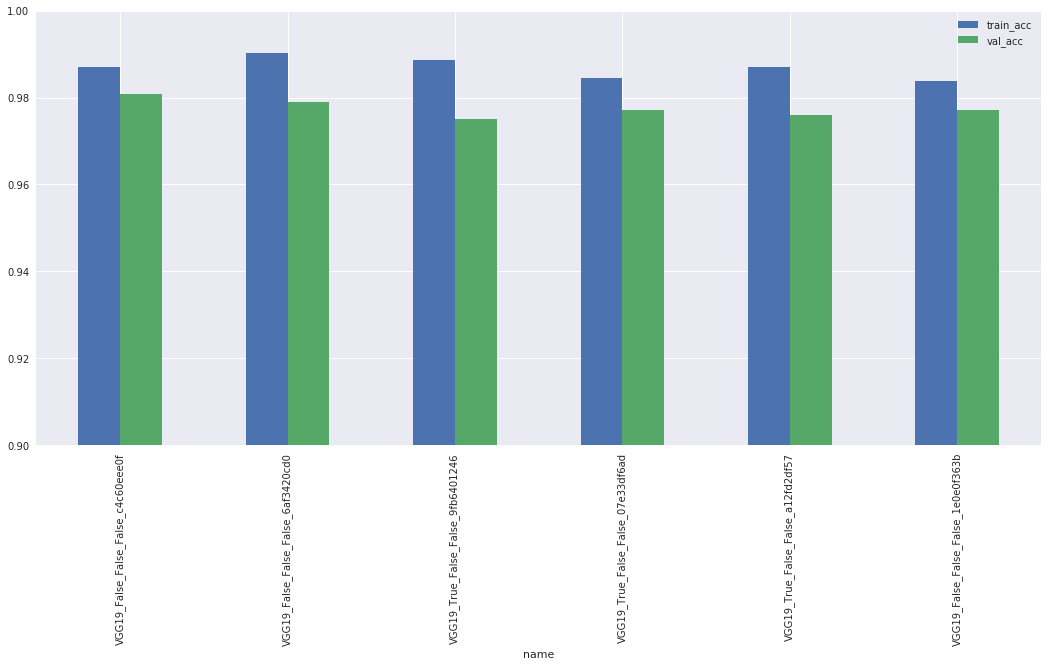

In [21]:
plot_bar(summary_over_98_df, "acc")

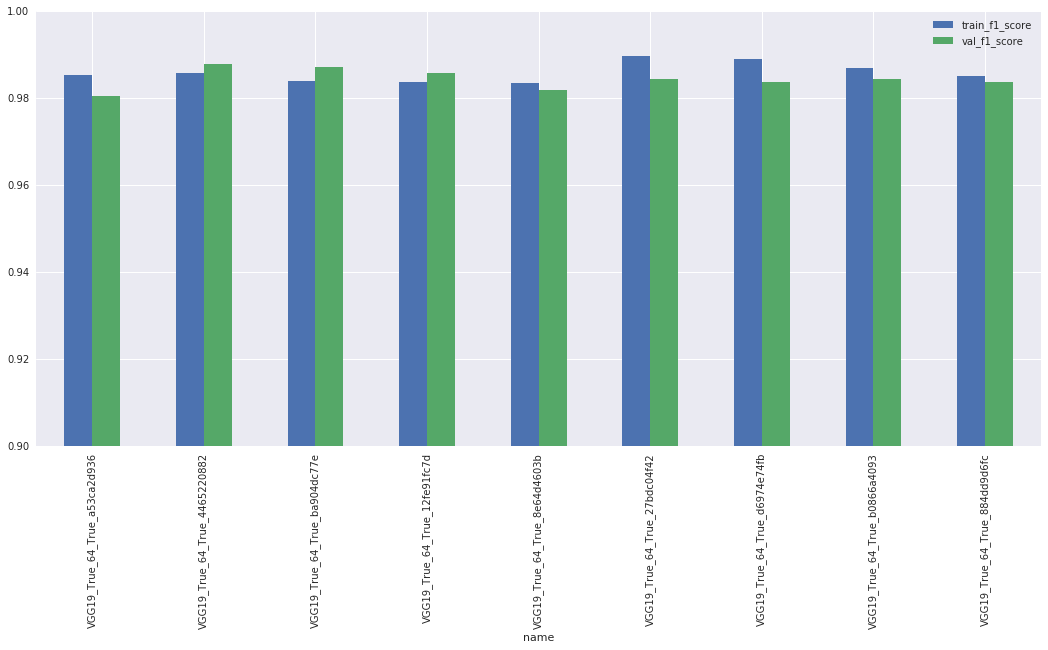

In [22]:
plot_bar(summary_over_98_df, "f1_score")

In [22]:
summary_df.loc[["VGG19_True_64_True_4465220882", "VGG19_True_64_True_ba904dc77e", "VGG19_True_64_True_b0866a4093"], ["train_acc", "val_acc", "train_f1_score", "val_f1_score"]]

KeyError: KeyError("None of [Index(['VGG19_True_64_True_4465220882', 'VGG19_True_64_True_ba904dc77e',\n       'VGG19_True_64_True_b0866a4093'],\n      dtype='object', name='name')] are in the [index]",)